## CODE TO PERFORM VEHICLE DETECTION USING HOG/SVM


In [ ]:
# Dataset source:
# https://github.com/udacity/CarND-Vehicle-Detection
# http://www.gti.ssr.upm.es/data/Vehicle_database.html
# http://www.cvlibs.net/datasets/kitti/
        

# DISPLAY IMAGES

In [1]:
import cv2
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from skimage.feature import hog 


In [2]:
#import training dataset of vehicles/non-vehicles
import glob
car = glob.glob('data/car/**/*.png')
no_car = glob.glob('data/no car/**/*.png')


In [3]:
len(car)

8792

In [4]:
len(no_car)

8968

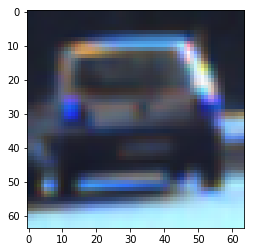

In [11]:
image_color = cv2.imread(car[430]) 
plt.imshow(image_color)

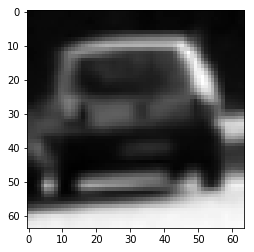

In [12]:
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap = 'gray')

# GET HOG FEATURES

In [13]:

features, hog_image = hog(image_gray, 
                          orientations = 11, 
                          pixels_per_cell = (16, 16), 
                          cells_per_block = (2, 2), 
                          transform_sqrt = False, 
                          visualize = True, 
                          feature_vector = True)

features.shape 

/usr/local/lib/python3.5/dist-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


(396,)

In [9]:
hog_image.shape

(64, 64)

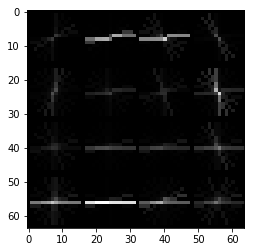

In [14]:
plt.imshow(hog_image, cmap = 'gray')


# HOG FEATURE EXTRACTION AND TRAINING DATASET CREATION
### (do the abve for the entire dataset)

In [ ]:
car_hog_accum = []

for i in car:
    image_color = mpimg.imread(i)
    image_gray  = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

    car_hog_feature, car_hog_img = hog(image_color[:,:,0], 
                                    orientations = 11, 
                                    pixels_per_cell = (16, 16), 
                                    cells_per_block = (2, 2), 
                                    transform_sqrt = False, 
                                    visualize = True, 
                                    feature_vector = True)
                
    car_hog_accum.append(car_hog_feature)

In [17]:
car_hog_acc

[array([2.86198842e-02, 1.51454606e-02, 2.10172571e-02, 1.61401780e-02,
        1.57255890e-02, 4.68720982e-02, 2.98729995e-02, 1.87969112e-02,
        1.32941712e-02, 1.70982884e-02, 1.32187949e-02, 1.74792760e-02,
        7.51616691e-03, 1.63662671e-02, 1.36603823e-02, 5.61194587e-02,
        3.07789764e-01, 3.28584702e-02, 7.17997756e-03, 8.31135405e-03,
        2.45434012e-03, 7.35543030e-03, 2.63610722e-02, 2.66923405e-02,
        1.12455625e-02, 1.44532230e-02, 1.05402136e-02, 3.91750462e-02,
        1.71597504e-02, 1.63556992e-02, 7.09401467e-03, 1.37842884e-02,
        1.21675865e-02, 8.55253838e-03, 2.56589430e-03, 1.48116657e-03,
        2.79102184e-03, 6.09118570e-03, 3.61569979e-02, 1.40028111e-02,
        5.61421297e-03, 3.58295487e-03, 5.68883880e-03, 5.52869480e-03,
        1.48286093e-02, 6.37636835e-03, 1.38843840e-02, 1.15888365e-02,
        4.76091530e-02, 2.61114599e-01, 2.78756063e-02, 6.09116085e-03,
        7.05096834e-03, 2.08214864e-03, 6.24000685e-03, 1.118275

In [ ]:
X_car = np.vstack(car_hog_accum).astype(np.float64)  
y_car = np.ones(len(X_car))

In [18]:
X_car

array([[0.02861988, 0.01514546, 0.02101726, ..., 0.0042511 , 0.00252442,
        0.00100353],
       [0.00480557, 0.01254575, 0.01069503, ..., 0.02347872, 0.02744669,
        0.07127712],
       [0.04072632, 0.02306717, 0.01945657, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.02432845, 0.07301144, 0.0486872 , ..., 0.00572312, 0.00983057,
        0.00593195],
       [0.00627688, 0.02073254, 0.03556571, ..., 0.00350876, 0.00058299,
        0.0010571 ],
       [0.0342494 , 0.04498348, 0.03548384, ..., 0.01065767, 0.00656241,
        0.0012998 ]])

In [14]:
X_car.shape

(8792, 396)

In [15]:
y_car.shape

(8792,)

In [16]:
y_car

array([1., 1., 1., ..., 1., 1., 1.])

In [19]:
nocar_hog_accum = []

for i in no_car:
    image_color = mpimg.imread(i)
    image_gray  = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

    nocar_hog_feature, car_hog_img = hog(image_color[:,:,0], 
                                    orientations = 11, 
                                    pixels_per_cell = (16, 16), 
                                    cells_per_block = (2, 2), 
                                    transform_sqrt = False, 
                                    visualize = True, 
                                    feature_vector = True)
                
    nocar_hog_accum.append(nocar_hog_feature)


/usr/local/lib/python3.5/dist-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


In [20]:
X_nocar = np.vstack(nocar_hog_accum).astype(np.float64)  
y_nocar = np.zeros(len(X_nocar))



In [19]:
X_nocar.shape

(8968, 396)

In [20]:
y_nocar.shape

(8968,)

In [21]:
X = np.vstack((X_car, X_nocar))
X.shape

(17760, 396)

In [22]:
y = np.hstack((y_car, y_nocar))
y.shape

(17760,)

# SVM MODEL CLASSIFIER TRAINING 

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)


In [24]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,confusion_matrix
svc_model = LinearSVC()
svc_model.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

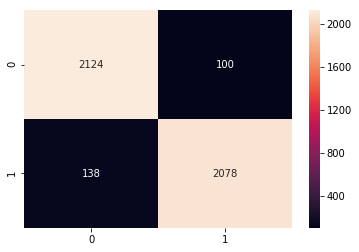

In [25]:
y_predict = svc_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True, fmt="d")

In [26]:
print(classification_report(y_test, y_predict))

             precision    recall  f1-score   support

        0.0       0.94      0.95      0.95      2224
        1.0       0.95      0.94      0.94      2216

avg / total       0.95      0.95      0.95      4440



In [27]:
Model_prediction = svc_model.predict(X_test[0:50])
Model_prediction


array([0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.])

In [28]:
Model_TrueLabel = y_test[0:50]
Model_TrueLabel

array([0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.])

# IMPROVE THE MODEL 

In [58]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(X_train,y_train)
grid.best_params_
grid.best_estimator_


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9585585585585585, total=  35.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9567567567567568, total=  21.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.6min remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9581081081081081, total=  21.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.2min remaining:    0.0s


[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8905405405405405, total=  40.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8941441441441441, total=  41.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8995495495495496, total=  41.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.7063063063063063, total= 1.0min
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.7103603603603603, total= 1.0min
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6995495495495495, total= 1.0min
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.5063063063063064, total= 1.0min
[CV] C=0.1, gamma=0.001, kernel=rbf .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 36.8min finished


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2224
         1.0       0.99      0.99      0.99      2216

   micro avg       0.99      0.99      0.99      4440
   macro avg       0.99      0.99      0.99      4440
weighted avg       0.99      0.99      0.99      4440



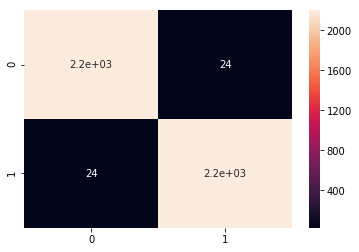

In [59]:
grid_predictions = grid.predict(X_test)
cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot=True)
print(classification_report(y_test,grid_predictions))

# TEST THE MODEL (FIND CARS)!

622

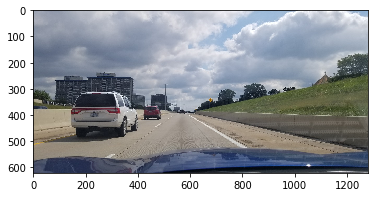

In [60]:
test_image = mpimg.imread('my_test_image_resized.jpg')
test_image = test_image.astype(np.float32)/255
plt.imshow(test_image)
test_image.shape[0]

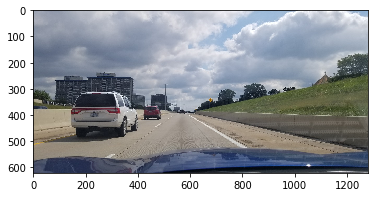

In [100]:
h_start = 300 #(int)(test_image.shape[0] / 2 - 50)
h_stop = 480 #test_image.shape[0] - 100

(180, 1280, 3)

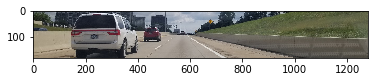

In [101]:
pixels_in_cell = 16
HOG_orientations = 11
cells_in_block = 2
cells_in_step = 3 


masked_region = test_image[h_start:h_stop,:,:]
plt.imshow(masked_region)
masked_region.shape

In [102]:
resizing_factor = 2
masked_region_shape = masked_region.shape
L = masked_region_shape[1]/resizing_factor
W = masked_region_shape[0]/resizing_factor

(90, 640, 3)


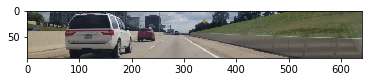

In [103]:
masked_region_resized = cv2.resize(masked_region, (np.int(L), np.int(W)))
masked_region_resized_R = masked_region_resized[:,:,0]

print(masked_region_resized.shape)
plt.imshow(masked_region_resized)


In [104]:
    
print(masked_region_resized_R.shape)    
masked_region_hog_feature_all, hog_img = hog(masked_region_resized_R, orientations = 11, pixels_per_cell = (16, 16), cells_per_block = (2, 2), transform_sqrt = False, visualize = True, feature_vector = False)
 

(90, 640)


/usr/local/lib/python3.5/dist-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


In [111]:
n_blocks_x = (masked_region_resized_R.shape[1] // pixels_in_cell)+1  
n_blocks_y = (masked_region_resized_R.shape[0] // pixels_in_cell)+1

#nfeat_per_block = orientations * cells_in_block **2 
blocks_in_window = (64 // pixels_in_cell)-1 
    
steps_x = (n_blocks_x - blocks_in_window) // cells_in_step
steps_y = (n_blocks_y - blocks_in_window) // cells_in_step

rectangles_found = []

for xb in range(steps_x):
    for yb in range(steps_y):
        y_position = yb*cells_in_step
        x_position = xb*cells_in_step
            
        hog_feat_sample = masked_region_hog_feature_all[y_position : y_position + blocks_in_window, x_position : x_position + blocks_in_window].ravel()
        x_left = x_position * pixels_in_cell
        y_top = y_position * pixels_in_cell
        #print(hog_feat_sample.shape)  
        
        # predict using trained SVM
        test_prediction = svc_model.predict(hog_feat_sample.reshape(1,-1))
        #test_prediction = grid.predict(hog_feat_sample.reshape(1,-1))
        
        if test_prediction == 1: 
            rectangle_x_left = np.int(x_left * resizing_factor)
            rectangle_y_top = np.int(y_top * resizing_factor)
            window_dim = np.int(64 * resizing_factor)
            rectangles_found.append(((rectangle_x_left, rectangle_y_top + h_start),(rectangle_x_left + window_dim, rectangle_y_top + window_dim + h_start)))
                

In [112]:
rectangles_found

[((192, 300), (320, 428)), ((384, 300), (512, 428))]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


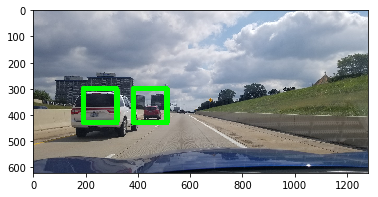

In [113]:
Image_with_Rectangles_Drawn = np.copy(test_image)
    
for rectangle in rectangles_found:
    cv2.rectangle(Image_with_Rectangles_Drawn, rectangle[0], rectangle[1], (0, 255, 0), 20)

plt.imshow(Image_with_Rectangles_Drawn)
        

# Well Done!